# WEBSITE DATA ANALYSIS

### import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

### Load dataset

In [2]:
df = pd.read_csv("website.csv")
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


### Data preprocessing

#### Remove unnamed column and make index 0 as a column 

In [10]:
df.columns = df.iloc[0]
df=df.drop(index=0).reset_index(drop= True)
df.columns=["channel group" , "DateHour" , "Users", "Session" , "Engaged Session", "Average engagement time per session", "Engaged sessions per user", "Events per session", "Engagement rate", "Event count"]
df.head(3)

,channel group,DateHour,Users,Session,Engaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
1,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
2,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3180 non-null   object
 1   DateHour                             3180 non-null   object
 2   Users                                3180 non-null   object
 3   Session                              3180 non-null   object
 4   Engaged Session                      3180 non-null   object
 5   Average engagement time per session  3180 non-null   object
 6   Engaged sessions per user            3180 non-null   object
 7   Events per session                   3180 non-null   object
 8   Engagement rate                      3180 non-null   object
 9   Event count                          3180 non-null   object
dtypes: object(10)
memory usage: 248.6+ KB


##### convert DateHour column to proper format and also make diff column for hour 

In [18]:
df['DateHour'] = pd.to_datetime(df['DateHour'], format='%Y%m%d%H', errors='coerce')
df['Hour'] = df['DateHour'].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3180 non-null   object        
 1   DateHour                             3180 non-null   datetime64[ns]
 2   Users                                3180 non-null   object        
 3   Session                              3180 non-null   object        
 4   Engaged Session                      3180 non-null   object        
 5   Average engagement time per session  3180 non-null   object        
 6   Engaged sessions per user            3180 non-null   object        
 7   Events per session                   3180 non-null   object        
 8   Engagement rate                      3180 non-null   object        
 9   Event count                          3180 non-null   object        
 10  Hour        

In [19]:
df.head(3)

,channel group,DateHour,Users,Session,Engaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069,23
1,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044,18
2,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001,20


##### assign proper datatypes

In [20]:
dt = df.columns.drop(['channel group','DateHour'])
df[dt] = df[dt].apply(pd.to_numeric,errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3180 non-null   object        
 1   DateHour                             3180 non-null   datetime64[ns]
 2   Users                                3180 non-null   int64         
 3   Session                              3180 non-null   int64         
 4   Engaged Session                      3180 non-null   int64         
 5   Average engagement time per session  3180 non-null   float64       
 6   Engaged sessions per user            3180 non-null   float64       
 7   Events per session                   3180 non-null   float64       
 8   Engagement rate                      3180 non-null   float64       
 9   Event count                          3180 non-null   int64         
 10  Hour        

In [21]:
df.describe()

,DateHour,Users,Session,Engaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3180,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,2024-04-20 01:19:32.830188800,41.822327,51.046541,28.256604,66.661457,0.606440,4.676089,0.503406,241.623270,11.801258
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:00:00,20.000000,24.000000,13.000000,32.105625,0.561404,3.750000,0.442857,103.000000,6.000000
50%,2024-04-20 02:30:00,42.000000,51.000000,27.000000,49.068279,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.509259,0.750000,5.218581,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,188.000000,256.000000,125.000000,4525.000000,2.000000,56.000000,1.000000,1117.000000,23.000000
std,NaN,29.240446,36.466375,20.472406,127.238737,0.264105,2.796099,0.228277,182.643504,6.884807


In [22]:
df.head()

,channel group,DateHour,Users,Session,Engaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
1,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
2,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
3,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
4,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19


#### 1.What patterns or trends can you observe in website sessions and users over time?

In [23]:
sns.set(style='whitegrid')

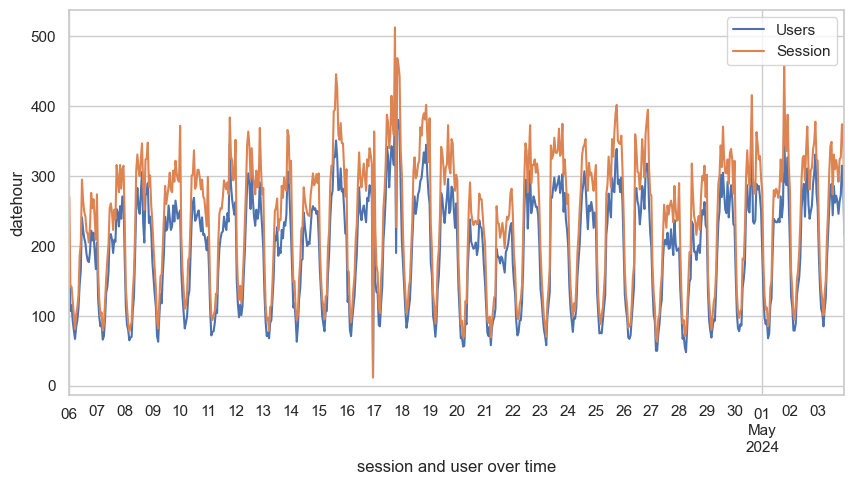

In [29]:
plt.figure(figsize=(10,5))
df.groupby('DateHour')[['Users','Session']].sum().plot(ax=plt.gca())
plt.xlabel("session and user over time")
plt.ylabel('datehour')
plt.show()

##### 2.Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?

C:\Users\Pritam -PC\AppData\Local\Temp\ipykernel_7480\2434372263.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="channel group",y="Users",estimator=np.sum,palette='viridis')


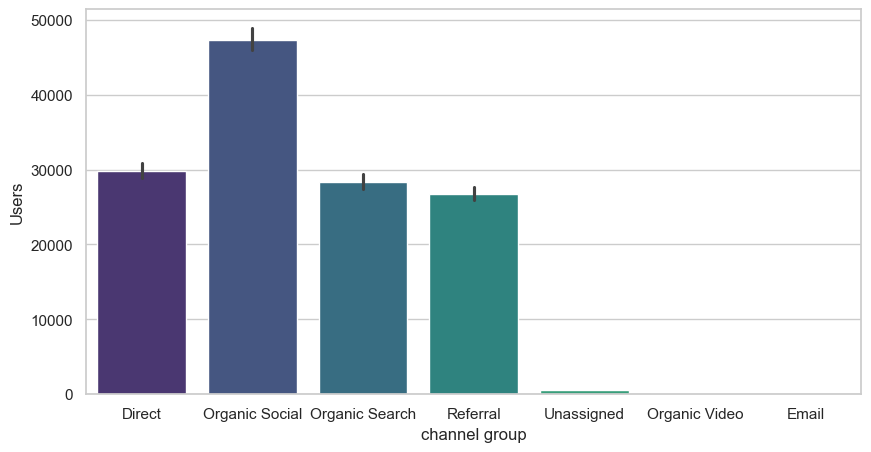

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="channel group",y="Users",estimator=np.sum,palette='viridis')
plt.show()

##### 3.Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?

C:\Users\Pritam -PC\AppData\Local\Temp\ipykernel_7480\772818111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="channel group",y="Average engagement time per session",palette='magma')


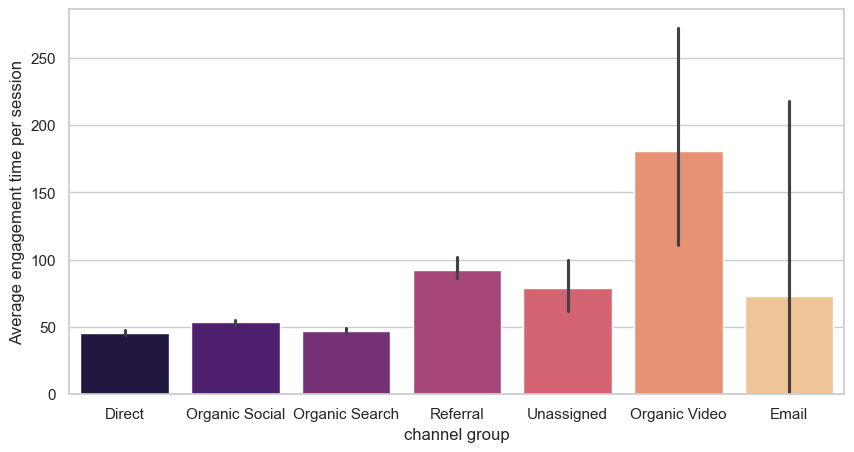

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="channel group",y="Average engagement time per session",palette='magma')
plt.xlabel("channel group")
plt.ylabel("Average engagement time per session")
plt.show()

##### 4.How does engagement rate vary across different traffic channels?

C:\Users\Pritam -PC\AppData\Local\Temp\ipykernel_7480\3501345141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="channel group",y="Engagement rate",palette='coolwarm')


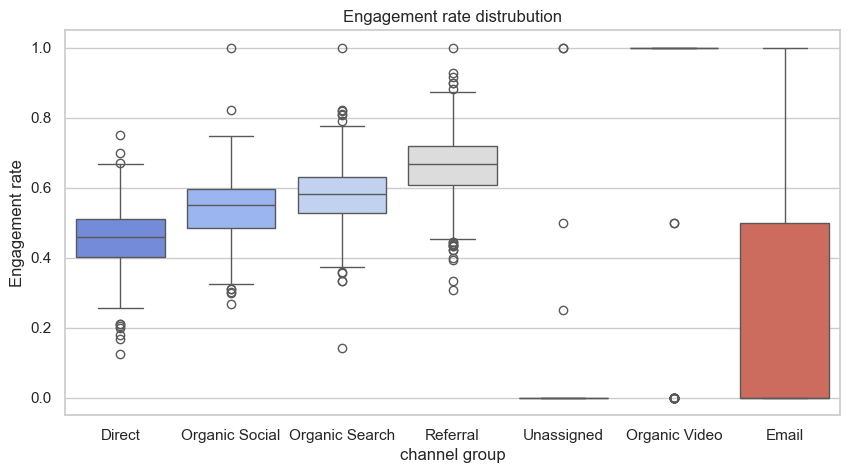

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="channel group",y="Engagement rate",palette='coolwarm')
plt.title("Engagement rate distrubution")
plt.show()

##### 5.Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


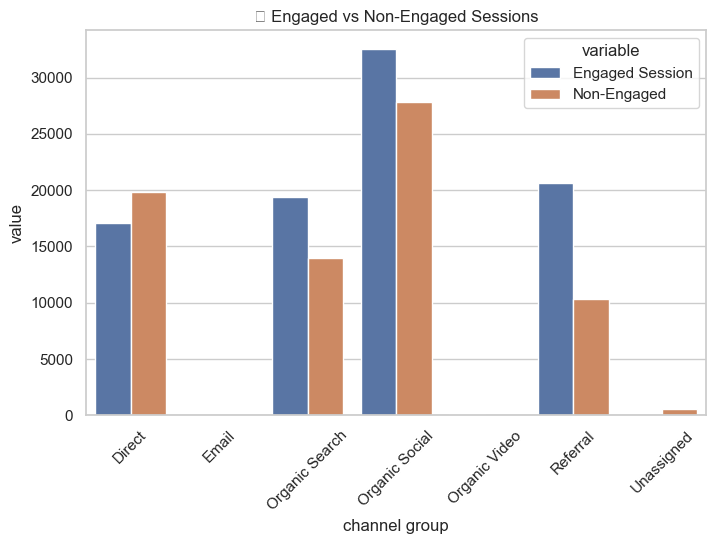

In [50]:
session_df = df.groupby("channel group")[["Session","Engaged Session"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Session"] - session_df["Engaged Session"]
session_df_melted = session_df.melt(id_vars="channel group", value_vars=["Engaged Session", "Non-Engaged"])
plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="channel group", y="value", hue="variable")
plt.title("📊 Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

In [51]:
session_df

,channel group,Session,Engaged Session,Non-Engaged
0,Direct,36903,17099,19804
1,Email,3,1,2
2,Organic Search,33372,19425,13947
3,Organic Social,60360,32565,27795
4,Organic Video,141,109,32
5,Referral,30990,20653,10337
6,Unassigned,559,4,555


##### 6.At what hours of the day does each channel drive the most traffic?

In [53]:
heatmap_data = df.groupby(["Hour","channel group"])["Session"].sum().unstack()

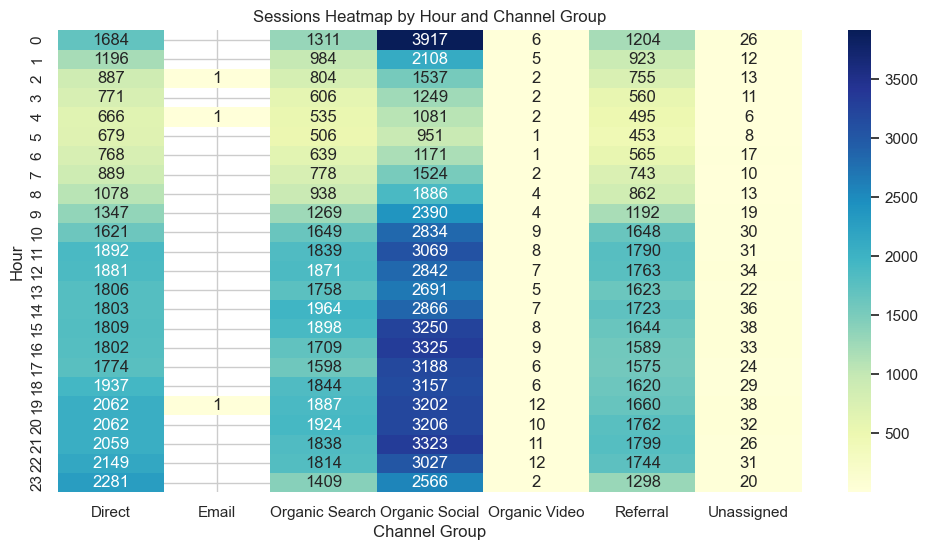

In [54]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Sessions Heatmap by Hour and Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Hour")
plt.show()

##### 7.Is there any correlation between high traffic (sessions) and high engagement rate over time?

In [56]:
df_plot = df.groupby("DateHour")[["Engagement rate","Session"]].mean().reset_index()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


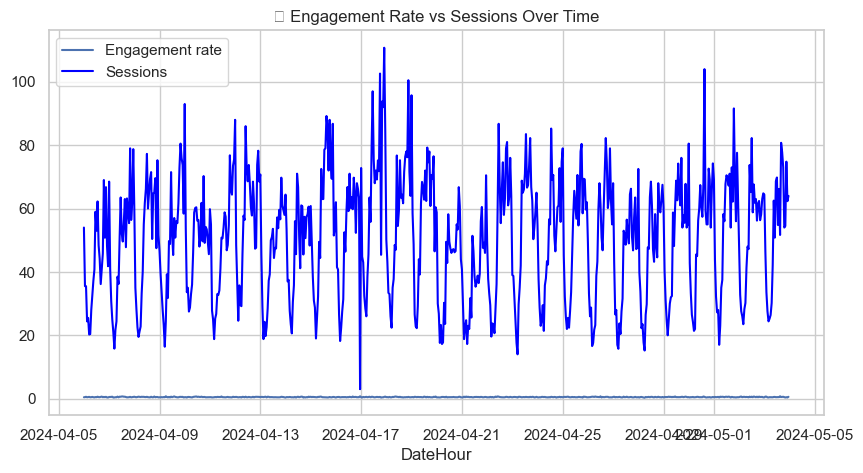

In [58]:
plt.figure(figsize=(10,5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate")
plt.plot(df_plot["DateHour"], df_plot["Session"], label="Sessions", color="blue")
plt.title("📈 Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()

In [60]:
df_plot.head()

,DateHour,Engagement rate,Session
0,2024-04-06 00:00:00,0.450262,54.0
1,2024-04-06 01:00:00,0.489905,35.5
2,2024-04-06 02:00:00,0.595759,35.5
3,2024-04-06 03:00:00,0.446725,24.4
4,2024-04-06 04:00:00,0.494964,25.5


### Conclusion